SaaS PRICING MODEL SELECTION - DATA CLEANING

1. LOADING RAW DATASETS...

1.1 Loading Ravenstack (SaaS Subscription) datasets...
  - Accounts: (500, 10)
  - Churn Events: (600, 9)
  - Feature Usage: (25000, 8)
  - Subscriptions: (5000, 14)
  - Support Tickets: (2000, 9)

1.2 Loading CAC-LTV Model dataset...
  - CAC-LTV: (7057, 15)

1.3 Loading SaaS Businesses dataset...
  - SaaS Businesses: (126, 21)

2. CLEANING DATASET 1: RAVENSTACK (SaaS SUBSCRIPTION & CHURN)

2.1 Cleaning Accounts table...
Initial shape: (500, 10)
Missing values:
account_id         0
account_name       0
industry           0
country            0
signup_date        0
referral_source    0
plan_tier          0
seats              0
is_trial           0
churn_flag         0
dtype: int64
Shape after removing duplicates: (500, 10)

2.2 Cleaning Subscriptions table...
Initial shape: (5000, 14)
Missing values:
subscription_id         0
account_id              0
start_date              0
end_date             4514
plan_tier  

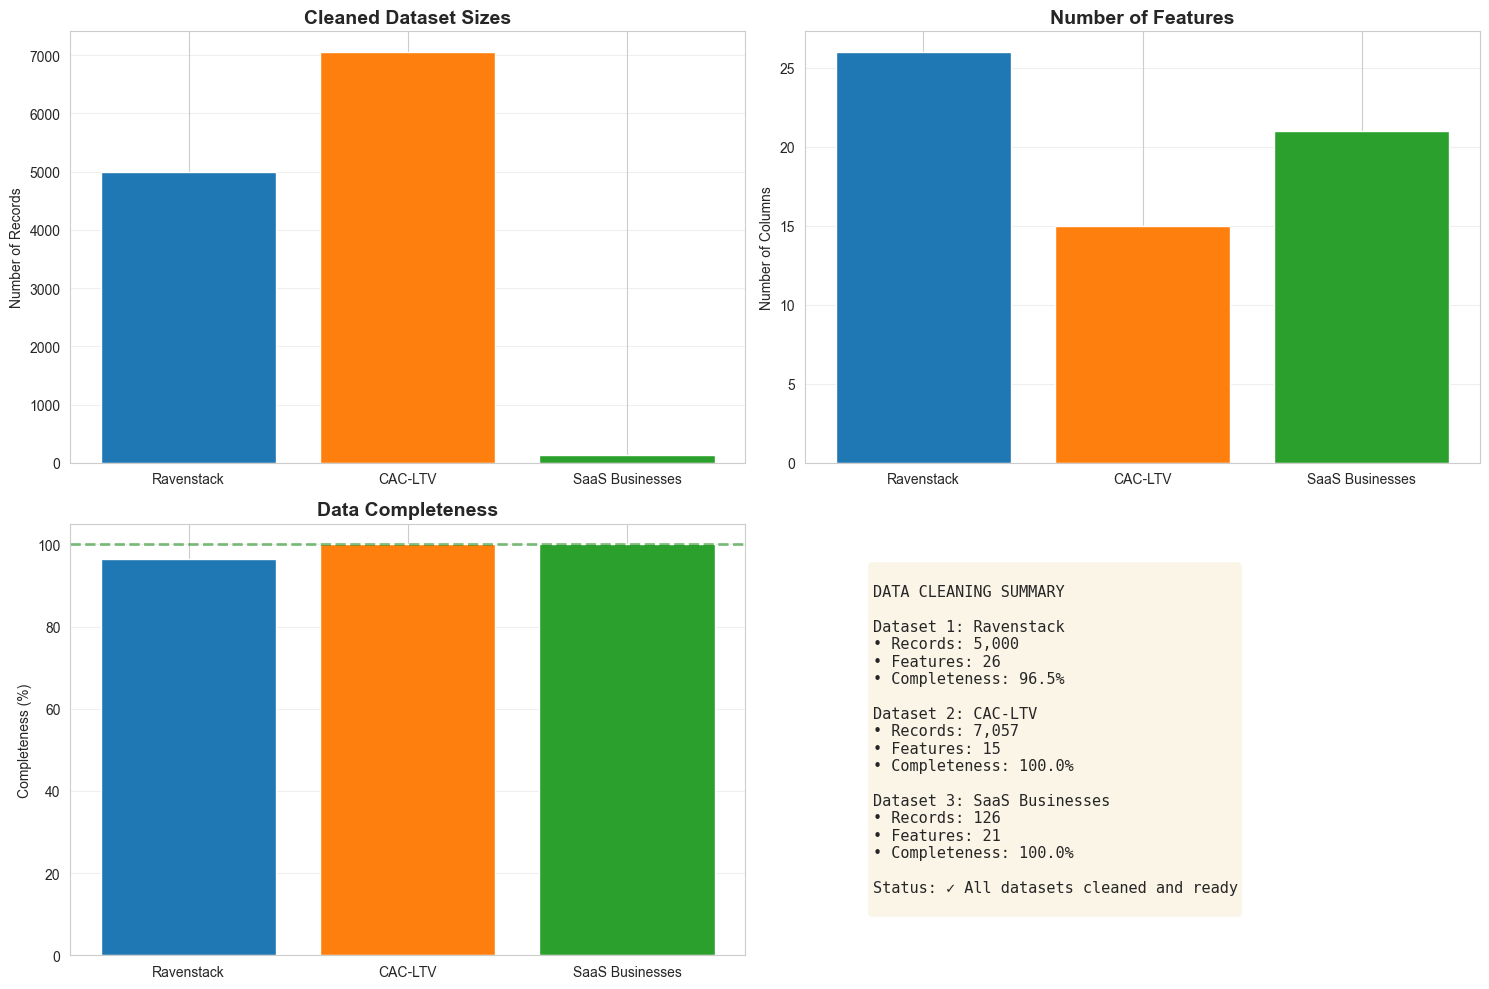


✓ Data cleaning notebook completed successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print("=" * 80)
print("SaaS PRICING MODEL SELECTION - DATA CLEANING")
print("=" * 80)

# ============================================================================
# SECTION 1: LOAD RAW DATASETS
# ============================================================================

print("\n1. LOADING RAW DATASETS...")

# Dataset 1: SaaS Subscription & Churn Analytics (Rivalytics)
print("\n1.1 Loading Ravenstack (SaaS Subscription) datasets...")
ravenstack_accounts = pd.read_csv('../Raw Project Datasets/SaaS Subscription & Churn Analytics Dataset/ravenstack_accounts.csv')
ravenstack_churn = pd.read_csv('../Raw Project Datasets/SaaS Subscription & Churn Analytics Dataset/ravenstack_churn_events.csv')
ravenstack_features = pd.read_csv('../Raw Project Datasets/SaaS Subscription & Churn Analytics Dataset/ravenstack_feature_usage.csv')
ravenstack_subscriptions = pd.read_csv('../Raw Project Datasets/SaaS Subscription & Churn Analytics Dataset/ravenstack_subscriptions.csv')
ravenstack_support = pd.read_csv('../Raw Project Datasets/SaaS Subscription & Churn Analytics Dataset/ravenstack_support_tickets.csv')

print(f"  - Accounts: {ravenstack_accounts.shape}")
print(f"  - Churn Events: {ravenstack_churn.shape}")
print(f"  - Feature Usage: {ravenstack_features.shape}")
print(f"  - Subscriptions: {ravenstack_subscriptions.shape}")
print(f"  - Support Tickets: {ravenstack_support.shape}")

# Dataset 2: CAC-LTV Model Analysis
print("\n1.2 Loading CAC-LTV Model dataset...")
cac_ltv = pd.read_csv('../Raw Project Datasets/CAC-LTV Model Analysis for SaaS Business Insights/cac_ltv_model.csv')
print(f"  - CAC-LTV: {cac_ltv.shape}")

# Dataset 3: Business Startups Data on SaaS Products
print("\n1.3 Loading SaaS Businesses dataset...")
saas_businesses = pd.read_csv('../Raw Project Datasets/Business Startups Data on SAAS products/saas-businesses-data.csv')
print(f"  - SaaS Businesses: {saas_businesses.shape}")

# ============================================================================
# SECTION 2: DATASET 1 - RAVENSTACK CLEANING
# ============================================================================

print("\n" + "=" * 80)
print("2. CLEANING DATASET 1: RAVENSTACK (SaaS SUBSCRIPTION & CHURN)")
print("=" * 80)

# 2.1 Clean Accounts
print("\n2.1 Cleaning Accounts table...")
print(f"Initial shape: {ravenstack_accounts.shape}")
print(f"Missing values:\n{ravenstack_accounts.isnull().sum()}")

# Remove duplicates
ravenstack_accounts = ravenstack_accounts.drop_duplicates(subset=['account_id'])
print(f"Shape after removing duplicates: {ravenstack_accounts.shape}")

# Handle missing values
if ravenstack_accounts.isnull().sum().sum() > 0:
    print("Handling missing values...")
    # Fill categorical with mode, numerical with median
    for col in ravenstack_accounts.columns:
        if ravenstack_accounts[col].isnull().sum() > 0:
            if ravenstack_accounts[col].dtype == 'object':
                ravenstack_accounts[col].fillna(ravenstack_accounts[col].mode()[0], inplace=True)
            else:
                ravenstack_accounts[col].fillna(ravenstack_accounts[col].median(), inplace=True)

# 2.2 Clean Subscriptions
print("\n2.2 Cleaning Subscriptions table...")
print(f"Initial shape: {ravenstack_subscriptions.shape}")
print(f"Missing values:\n{ravenstack_subscriptions.isnull().sum()}")

# Remove duplicates
ravenstack_subscriptions = ravenstack_subscriptions.drop_duplicates()
print(f"Shape after removing duplicates: {ravenstack_subscriptions.shape}")

# Convert date columns
date_cols = [col for col in ravenstack_subscriptions.columns if 'date' in col.lower()]
for col in date_cols:
    ravenstack_subscriptions[col] = pd.to_datetime(ravenstack_subscriptions[col], errors='coerce')

# Handle missing values in subscriptions
for col in ravenstack_subscriptions.columns:
    if ravenstack_subscriptions[col].isnull().sum() > 0:
        if ravenstack_subscriptions[col].dtype == 'object':
            ravenstack_subscriptions[col].fillna(ravenstack_subscriptions[col].mode()[0], inplace=True)
        elif pd.api.types.is_datetime64_any_dtype(ravenstack_subscriptions[col]):
            continue  # Keep datetime nulls for now
        else:
            ravenstack_subscriptions[col].fillna(ravenstack_subscriptions[col].median(), inplace=True)

# 2.3 Clean Churn Events
print("\n2.3 Cleaning Churn Events table...")
print(f"Initial shape: {ravenstack_churn.shape}")
print(f"Missing values:\n{ravenstack_churn.isnull().sum()}")

ravenstack_churn = ravenstack_churn.drop_duplicates()
date_cols = [col for col in ravenstack_churn.columns if 'date' in col.lower()]
for col in date_cols:
    ravenstack_churn[col] = pd.to_datetime(ravenstack_churn[col], errors='coerce')

# 2.4 Clean Feature Usage
print("\n2.4 Cleaning Feature Usage table...")
print(f"Initial shape: {ravenstack_features.shape}")
ravenstack_features = ravenstack_features.drop_duplicates()
print(f"Shape after removing duplicates: {ravenstack_features.shape}")

# 2.5 Clean Support Tickets
print("\n2.5 Cleaning Support Tickets table...")
print(f"Initial shape: {ravenstack_support.shape}")
ravenstack_support = ravenstack_support.drop_duplicates()
print(f"Shape after removing duplicates: {ravenstack_support.shape}")

# 2.6 Merge Ravenstack tables into single dataset
print("\n2.6 Merging Ravenstack tables...")

# Start with subscriptions as base
merged_ravenstack = ravenstack_subscriptions.copy()

# Add account information
merged_ravenstack = merged_ravenstack.merge(ravenstack_accounts, on='account_id', how='left')

# Add churn status
if 'account_id' in ravenstack_churn.columns:
    churn_status = ravenstack_churn.groupby('account_id').size().reset_index(name='churn_events_count')
    churn_status['churned'] = 1
    merged_ravenstack = merged_ravenstack.merge(churn_status, on='account_id', how='left')
    merged_ravenstack['churned'].fillna(0, inplace=True)
    merged_ravenstack['churn_events_count'].fillna(0, inplace=True)

# Add feature usage metrics
if 'account_id' in ravenstack_features.columns:
    feature_agg = ravenstack_features.groupby('account_id').agg({
        ravenstack_features.columns[1]: 'count'  # Count of feature uses
    }).reset_index()
    feature_agg.columns = ['account_id', 'feature_usage_count']
    merged_ravenstack = merged_ravenstack.merge(feature_agg, on='account_id', how='left')
    merged_ravenstack['feature_usage_count'].fillna(0, inplace=True)

# Add support ticket metrics
if 'account_id' in ravenstack_support.columns:
    support_agg = ravenstack_support.groupby('account_id').size().reset_index(name='support_tickets_count')
    merged_ravenstack = merged_ravenstack.merge(support_agg, on='account_id', how='left')
    merged_ravenstack['support_tickets_count'].fillna(0, inplace=True)

print(f"Merged Ravenstack shape: {merged_ravenstack.shape}")
print(f"Columns: {list(merged_ravenstack.columns)}")

# ============================================================================
# SECTION 3: DATASET 2 - CAC-LTV CLEANING
# ============================================================================

print("\n" + "=" * 80)
print("3. CLEANING DATASET 2: CAC-LTV MODEL")
print("=" * 80)

print(f"Initial shape: {cac_ltv.shape}")
print(f"Missing values:\n{cac_ltv.isnull().sum()}")

# Remove duplicates
cac_ltv = cac_ltv.drop_duplicates()
print(f"Shape after removing duplicates: {cac_ltv.shape}")

# Handle missing values
for col in cac_ltv.columns:
    if cac_ltv[col].isnull().sum() > 0:
        if cac_ltv[col].dtype == 'object':
            cac_ltv[col].fillna(cac_ltv[col].mode()[0], inplace=True)
        else:
            cac_ltv[col].fillna(cac_ltv[col].median(), inplace=True)

# Remove outliers using IQR method for numerical columns
numerical_cols = cac_ltv.select_dtypes(include=[np.number]).columns
print(f"\nRemoving outliers from numerical columns...")
initial_rows = len(cac_ltv)

for col in numerical_cols:
    Q1 = cac_ltv[col].quantile(0.25)
    Q3 = cac_ltv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    cac_ltv = cac_ltv[(cac_ltv[col] >= lower_bound) & (cac_ltv[col] <= upper_bound)]

print(f"Rows removed: {initial_rows - len(cac_ltv)}")
print(f"Final shape: {cac_ltv.shape}")

# ============================================================================
# SECTION 4: DATASET 3 - SAAS BUSINESSES CLEANING
# ============================================================================

print("\n" + "=" * 80)
print("4. CLEANING DATASET 3: SAAS BUSINESSES")
print("=" * 80)

print(f"Initial shape: {saas_businesses.shape}")
print(f"Missing values:\n{saas_businesses.isnull().sum()}")

# Remove duplicates
saas_businesses = saas_businesses.drop_duplicates()
print(f"Shape after removing duplicates: {saas_businesses.shape}")

# Handle missing values
missing_threshold = 0.5  # Drop columns with >50% missing values
cols_to_drop = []
for col in saas_businesses.columns:
    missing_pct = saas_businesses[col].isnull().sum() / len(saas_businesses)
    if missing_pct > missing_threshold:
        cols_to_drop.append(col)
        print(f"  Dropping column '{col}' ({missing_pct:.1%} missing)")

saas_businesses = saas_businesses.drop(columns=cols_to_drop)

# Fill remaining missing values
for col in saas_businesses.columns:
    if saas_businesses[col].isnull().sum() > 0:
        if saas_businesses[col].dtype == 'object':
            saas_businesses[col].fillna(saas_businesses[col].mode()[0] if not saas_businesses[col].mode().empty else 'Unknown', inplace=True)
        else:
            saas_businesses[col].fillna(saas_businesses[col].median(), inplace=True)

print(f"Final shape: {saas_businesses.shape}")

# ============================================================================
# SECTION 5: DATA QUALITY SUMMARY
# ============================================================================

print("\n" + "=" * 80)
print("5. DATA QUALITY SUMMARY")
print("=" * 80)

print("\n5.1 Dataset 1: Ravenstack (Merged)")
print(f"  - Final rows: {len(merged_ravenstack)}")
print(f"  - Final columns: {len(merged_ravenstack.columns)}")
print(f"  - Missing values: {merged_ravenstack.isnull().sum().sum()}")
print(f"  - Duplicate rows: {merged_ravenstack.duplicated().sum()}")

print("\n5.2 Dataset 2: CAC-LTV")
print(f"  - Final rows: {len(cac_ltv)}")
print(f"  - Final columns: {len(cac_ltv.columns)}")
print(f"  - Missing values: {cac_ltv.isnull().sum().sum()}")
print(f"  - Duplicate rows: {cac_ltv.duplicated().sum()}")

print("\n5.3 Dataset 3: SaaS Businesses")
print(f"  - Final rows: {len(saas_businesses)}")
print(f"  - Final columns: {len(saas_businesses.columns)}")
print(f"  - Missing values: {saas_businesses.isnull().sum().sum()}")
print(f"  - Duplicate rows: {saas_businesses.duplicated().sum()}")

# ============================================================================
# SECTION 6: SAVE CLEANED DATASETS
# ============================================================================

print("\n" + "=" * 80)
print("6. SAVING CLEANED DATASETS")
print("=" * 80)

# Create cleaned data directory if it doesn't exist
cleaned_dir = Path('Cleaned Data')
cleaned_dir.mkdir(exist_ok=True)

# Save cleaned datasets
merged_ravenstack.to_csv('Cleaned Data/ravenstack_cleaned.csv', index=False)
print("✓ Saved: Cleaned Data/ravenstack_cleaned.csv")

cac_ltv.to_csv('Cleaned Data/cac_ltv_cleaned.csv', index=False)
print("✓ Saved: Cleaned Data/cac_ltv_cleaned.csv")

saas_businesses.to_csv('Cleaned Data/saas_businesses_cleaned.csv', index=False)
print("✓ Saved: Cleaned Data/saas_businesses_cleaned.csv")

print("\n" + "=" * 80)
print("DATA CLEANING COMPLETED SUCCESSFULLY!")
print("=" * 80)

# ============================================================================
# SECTION 7: BASIC VISUALIZATIONS
# ============================================================================

print("\n7. GENERATING DATA QUALITY VISUALIZATIONS...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Dataset sizes
ax1 = axes[0, 0]
datasets = ['Ravenstack', 'CAC-LTV', 'SaaS Businesses']
sizes = [len(merged_ravenstack), len(cac_ltv), len(saas_businesses)]
ax1.bar(datasets, sizes, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Cleaned Dataset Sizes', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Records')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Column counts
ax2 = axes[0, 1]
col_counts = [len(merged_ravenstack.columns), len(cac_ltv.columns), len(saas_businesses.columns)]
ax2.bar(datasets, col_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Number of Features', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Columns')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Data completeness
ax3 = axes[1, 0]
completeness = [
    (1 - merged_ravenstack.isnull().sum().sum() / (len(merged_ravenstack) * len(merged_ravenstack.columns))) * 100,
    (1 - cac_ltv.isnull().sum().sum() / (len(cac_ltv) * len(cac_ltv.columns))) * 100,
    (1 - saas_businesses.isnull().sum().sum() / (len(saas_businesses) * len(saas_businesses.columns))) * 100
]
ax3.bar(datasets, completeness, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax3.set_title('Data Completeness', fontsize=14, fontweight='bold')
ax3.set_ylabel('Completeness (%)')
ax3.set_ylim([0, 105])
ax3.axhline(y=100, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Summary text
ax4 = axes[1, 1]
ax4.axis('off')
summary_text = f"""
DATA CLEANING SUMMARY

Dataset 1: Ravenstack
• Records: {len(merged_ravenstack):,}
• Features: {len(merged_ravenstack.columns)}
• Completeness: {completeness[0]:.1f}%

Dataset 2: CAC-LTV
• Records: {len(cac_ltv):,}
• Features: {len(cac_ltv.columns)}
• Completeness: {completeness[1]:.1f}%

Dataset 3: SaaS Businesses
• Records: {len(saas_businesses):,}
• Features: {len(saas_businesses.columns)}
• Completeness: {completeness[2]:.1f}%

Status: ✓ All datasets cleaned and ready
"""
ax4.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('Cleaned Data/data_cleaning_summary.png', dpi=300, bbox_inches='tight')
print("✓ Saved: Cleaned Data/data_cleaning_summary.png")
plt.show()

print("\n✓ Data cleaning notebook completed successfully!")